In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal
import torch
import torch.nn as nn
from numpy import linalg as LA
from sklearn.preprocessing import MinMaxScaler
import random
%matplotlib inline

### Creating a dataset

In [46]:
np.random.seed(1)
mu = [0, 0]
Sigma = [[1, 1],
         [1, 2.5]]
         
# X is the design matrix and each row of X is an example
X = np.random.multivariate_normal(mu, Sigma, 10000)
X = np.concatenate([X, X[:, 0].reshape(len(X), 1)], axis=1)
X[:, 2] = X[:, 1] / 2
X = (X - X.mean(axis=0))
x, y, z = X.T

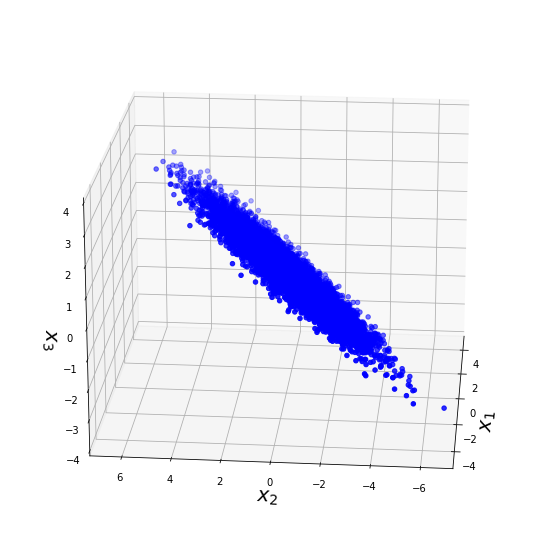

In [47]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(x, y, z, color = 'blue')

ax1.view_init(20, 185)
ax1.set_xlabel("$x_1$", fontsize=20)
ax1.set_ylabel("$x_2$", fontsize=20)
ax1.set_zlabel("$x_3$", fontsize=20)
ax1.set_xlim([-5, 5])
ax1.set_ylim([-7, 7])
ax1.set_zlim([-4, 4])

plt.show()

### PCA analysis

In [48]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [49]:
# Each row gives one of the principal components (eigenvectors)
pca.components_

array([[-0.38830581, -0.824242  , -0.412121  ],
       [-0.92153057,  0.34731128,  0.17365564],
       [ 0.        , -0.4472136 ,  0.89442719]])

In [50]:
pca.explained_variance_

array([3.64826952e+00, 5.13762062e-01, 3.20547162e-32])

In [51]:
v1 = pca.components_[0]
v2 = pca.components_[1]
v3 = pca.components_[2]

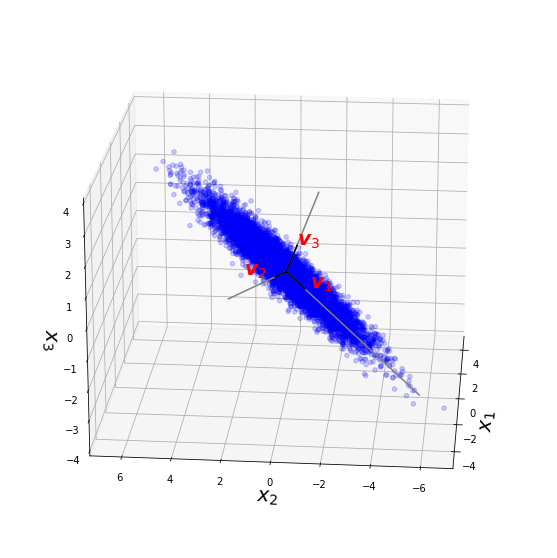

In [52]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(x, y, z, color = 'blue', alpha= 0.1)
ax1.plot([0, v1[0]], [0, v1[1]], [0, v1[2]],
         color="black", zorder=6)
ax1.plot([0, v2[0]], [0, v2[1]], [0, v2[2]],
         color="black", zorder=6)
ax1.plot([0, v3[0]], [0, v3[1]], [0, v3[2]],
         color="black", zorder=6)

ax1.scatter(x, y, z, color = 'blue', alpha= 0.1)
ax1.plot([0, 7*v1[0]], [0, 7*v1[1]], [0, 7*v1[2]],
         color="gray", zorder=5)
ax1.plot([0, 5*v2[0]], [0, 5*v2[1]], [0, 5*v2[2]],
         color="gray", zorder=5)
ax1.plot([0, 3*v3[0]], [0, 3*v3[1]], [0, 3*v3[2]],
         color="gray", zorder=5)

ax1.text(v1[0], v1[1]-0.2, v1[2], "$\mathregular{v}_1$", fontsize=20,
         color='red', weight="bold", style="italic", zorder=9)
ax1.text(v2[0], v2[1]+1.3, v2[2], "$\mathregular{v}_2$", fontsize=20,
         color='red', weight="bold", style="italic", zorder=9)
ax1.text(v3[0], v3[1], v3[2], "$\mathregular{v}_3$", fontsize=20, color='red',
         weight="bold", style="italic", zorder=9)

ax1.view_init(20, 185)
ax1.set_xlabel("$x_1$", fontsize=20, zorder=2)
ax1.set_ylabel("$x_2$", fontsize=20)
ax1.set_zlabel("$x_3$", fontsize=20)
ax1.set_xlim([-5, 5])
ax1.set_ylim([-7, 7])
ax1.set_zlim([-4, 4])

plt.show()

In [53]:
# Z* = UΣ
pca.transform(X)

array([[ 3.09698570e+00, -3.75386182e-01, -2.06378618e-17],
       [-9.49162774e-01, -7.96300950e-01, -5.13280752e-18],
       [ 1.79290419e+00, -1.62352748e+00,  2.41135694e-18],
       ...,
       [ 2.14708946e+00, -6.35303400e-01,  4.34271577e-17],
       [ 1.25724271e+00,  1.76475781e+00, -1.18976523e-17],
       [ 1.64921984e+00, -3.71612351e-02, -5.03148111e-17]])

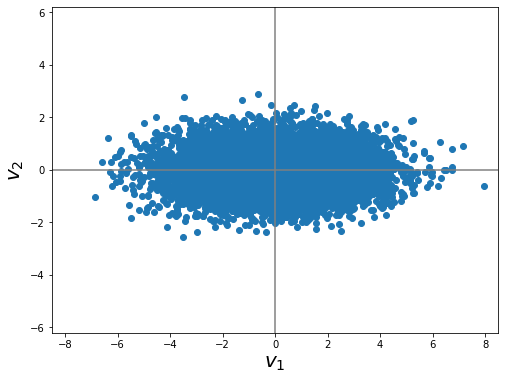

In [54]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(pca.transform(X)[:,0], pca.transform(X)[:,1])
plt.axis('equal')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.xlabel("$v_1$", fontsize=20)
plt.ylabel("$v_2$", fontsize=20)
plt.xlim([-8.5, 8.5])
plt.ylim([-4, 4])

plt.show()

### SVD

In [55]:
# Each row of V^T is one of the principal components (eigenvectors)
U, s, VT = LA.svd(X)
print("U=", np.round(U, 4))
print("Diagonal of elements of Σ=", np.round(s, 4))
print("V^T=", np.round(VT, 4))

U= [[ 1.620e-02 -5.200e-03  1.130e-02 ... -2.800e-03 -2.100e-02 -6.200e-03]
 [-5.000e-03 -1.110e-02  9.895e-01 ...  1.500e-03 -3.000e-04  1.100e-03]
 [ 9.400e-03 -2.270e-02  5.000e-04 ... -1.570e-02  1.510e-02 -7.100e-03]
 ...
 [ 1.120e-02 -8.900e-03 -1.800e-03 ...  9.998e-01  2.000e-04 -1.000e-04]
 [ 6.600e-03  2.460e-02  1.100e-03 ...  1.000e-04  9.993e-01 -0.000e+00]
 [ 8.600e-03 -5.000e-04 -1.100e-03 ... -1.000e-04 -0.000e+00  9.999e-01]]
Diagonal of elements of Σ= [190.9949  71.6736   0.    ]
V^T= [[-0.3883 -0.8242 -0.4121]
 [-0.9215  0.3473  0.1737]
 [ 0.     -0.4472  0.8944]]


In [56]:
k = 2
Sigma = np.zeros((X.shape[0], X.shape[1]))
Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)

In [57]:
X2 = U[:, :k] @ Sigma[:k, :k]  @ VT[:k, :]
X2

array([[-0.85664771, -2.68304155, -1.34152077],
       [ 1.10238109,  0.50577552,  0.25288776],
       [ 0.79993509, -2.04165634, -1.02082817],
       ...,
       [-0.24827581, -1.99036935, -0.99518468],
       [-2.11447292, -0.42335196, -0.21167598],
       [-0.60615644, -1.37226278, -0.68613139]])

In [58]:
# each row of Z*=U_k Σ_k gives the coordinate of projection of the same row of X onto a rank-k subspace
U[:, :k] @ Sigma[:k, :k] 

array([[ 3.0969857 , -0.37538618],
       [-0.94916277, -0.79630095],
       [ 1.79290419, -1.62352748],
       ...,
       [ 2.14708946, -0.6353034 ],
       [ 1.25724271,  1.76475781],
       [ 1.64921984, -0.03716124]])

### Linear autoencoder

In [59]:
seed = 9 
np.random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        ## encoder 
        self.encoder = nn.Linear(3, 2, bias=False)
        
        ## decoder 
        self.decoder = nn.Linear(2, 3, bias=False)
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
        
# initialize the NN
model1 = Autoencoder().double()
print(model1)

Autoencoder(
  (encoder): Linear(in_features=3, out_features=2, bias=False)
  (decoder): Linear(in_features=2, out_features=3, bias=False)
)


In [60]:
# specify the quadratic loss function
loss_func = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

In [61]:
X_train = torch.from_numpy(X) 

In [62]:
def train(model, loss_func, optimizer, n_epochs, X_train):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        encoded, decoded = model(X_train)
        loss = loss_func(decoded, X_train)
        loss.backward()
        optimizer.step()
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')
    return encoded, decoded

In [63]:
encoded, decoded = train(model1, loss_func, optimizer, 3000, X_train)

epoch 300 	 Loss: 0.4452
epoch 600 	 Loss: 0.1401
epoch 900 	 Loss: 0.05161
epoch 1200 	 Loss: 0.01191
epoch 1500 	 Loss: 0.003353
epoch 1800 	 Loss: 0.0009412
epoch 2100 	 Loss: 0.0002304
epoch 2400 	 Loss: 4.509e-05
epoch 2700 	 Loss: 6.658e-06
epoch 3000 	 Loss: 7.02e-07


In [64]:
encoded = encoded.detach().numpy()
decoded = decoded.detach().numpy()

In [65]:
# Z* values. Each row gives the coordinates of one of the projected data points
Zstar = encoded
Zstar

array([[ 2.57510917, -3.13073321],
       [-0.20285442,  1.38040138],
       [ 2.39553775, -1.16300036],
       ...,
       [ 2.0265917 , -1.99727172],
       [-0.18811382, -2.15635479],
       [ 1.26660007, -1.74235118]])

In [66]:
# Each row of W^[2] gives the wights of one of the neurons in the output layer
W2 = model1.decoder.weight
W2 = W2.detach().numpy()
W2

array([[ 0.77703505,  0.91276084],
       [-0.72734132,  0.25882988],
       [-0.36143178,  0.13109568]])

In [67]:
# Each row of Pstar (or column of W2) is one of the basis vectors
Wstar = W2.T
Wstar

array([[ 0.77703505, -0.72734132, -0.36143178],
       [ 0.91276084,  0.25882988,  0.13109568]])

In [68]:
w1 = Wstar[0]
w2 = Wstar[1]

In [69]:
# p1 and p2 are not orthogonal since thier inner product is not zero
np.dot(w1, w2)

0.47360735758938166

In [70]:
# X2 = Zstar @ Pstar
Zstar @ Wstar

array([[-0.8566606 , -2.68331059, -1.34115189],
       [ 1.10235133,  0.50483352,  0.25428269],
       [ 0.7998756 , -2.04339283, -1.0182878 ],
       ...,
       [-0.24829863, -1.99097748, -0.99430834],
       [-2.11440724, -0.42130609, -0.21469848],
       [-0.60615728, -1.37222311, -0.68620423]])

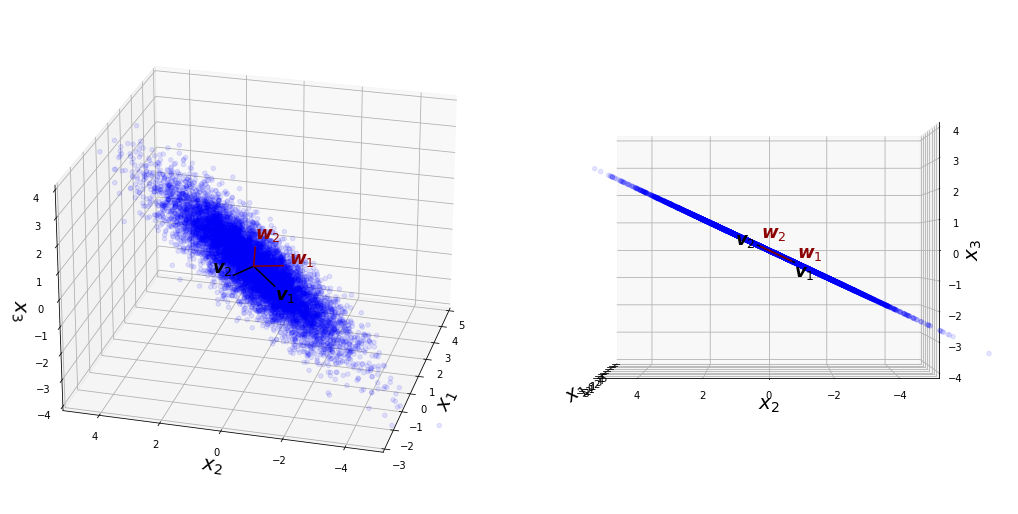

In [71]:
fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace = 0.01)
origin = [0], [0], [0] 

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.set_aspect('auto')
ax2.set_aspect('auto')
def plot_view(ax, view1, view2):
    ax.scatter(x, y, z, color = 'blue', alpha= 0.1)
    # Principal components 
    ax.plot([0, pca.components_[0,0]], [0, pca.components_[0,1]], [0, pca.components_[0,2]],
             color="black", zorder=5)
    ax.plot([0, pca.components_[1,0]], [0, pca.components_[1,1]], [0, pca.components_[1,2]],
             color="black", zorder=5)

    ax.text(pca.components_[0,0], pca.components_[0,1], pca.components_[0,2]-0.5,
             "$\mathregular{v}_1$", fontsize=18, color='black', weight="bold", style="italic")
    ax.text(pca.components_[1,0], pca.components_[1,1]+0.7, pca.components_[1,2],
             "$\mathregular{v}_2$", fontsize=18, color='black', weight="bold", style="italic")

    # New basis found by autoencoder
    ax.plot([0, w1[0]], [0, w1[1]], [0, w1[2]],
             color="darkred", zorder=5)
    ax.plot([0, w2[0]], [0, w2[1]], [0, w2[2]],
             color="darkred", zorder=5)

    ax.text(w1[0], w1[1]-0.2, w1[2]+0.1,
             "$\mathregular{w}_1$", fontsize=18, color='darkred', weight="bold", style="italic")
    ax.text(w2[0], w2[1], w2[2]+0.3,
             "$\mathregular{w}_2$", fontsize=18, color='darkred', weight="bold", style="italic")


    ax.view_init(view1, view2)
    ax.set_xlabel("$x_1$", fontsize=20, zorder=2)
    ax.set_ylabel("$x_2$", fontsize=20)
    ax.set_zlabel("$x_3$", fontsize=20)
    ax.set_xlim([-3, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-4, 4])
plot_view(ax1, 25, 195)
plot_view(ax2, 0, 180)

plt.show()

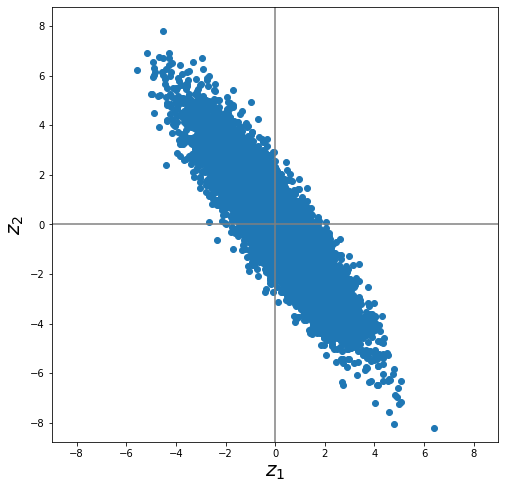

In [72]:
# This is not the right way to plot the projected data points in a 2d space
# since {w1, w2} is not an orthogonal basis

fig = plt.figure(figsize=(8, 8))
plt.scatter(Zstar[:, 0], Zstar[:, 1])
plt.axis('equal')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.xlabel("$z_1$", fontsize=20)
plt.ylabel("$z_2$", fontsize=20)
plt.xlim([-9,9])
plt.ylim([-9,9])

plt.show()

In [73]:
w1_V = np.array([np.dot(w1, v1), np.dot(w1, v2)])
w2_V = np.array([np.dot(w2, v1), np.dot(w2, v2)])
P_W = np.array([w1_V, w2_V]).T
P_W

array([[ 0.44673166, -0.62179608],
       [-1.03144006, -0.72847698]])

In [74]:
Zstar_V = np.zeros((Zstar.shape[0], Zstar.shape[1]))

In [75]:
for i in range(len(Zstar_V)):
    Zstar_V[i] = P_W @ Zstar[i]

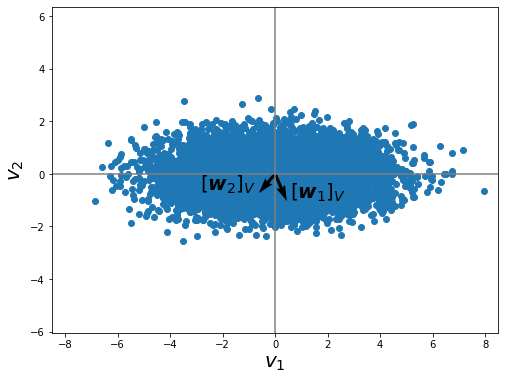

In [76]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(Zstar_V[:, 0], Zstar_V[:, 1])
plt.axis('equal')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.quiver(0, 0, w1_V[0], w1_V[1], color=['black'], width=0.007,
           angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, w2_V[0], w2_V[1], color=['black'], width=0.007,
           angles='xy', scale_units='xy', scale=1)
plt.text(w1_V[0]+0.1, w2_V[1]-0.2, "$[\mathregular{w}_1]_V$", weight="bold",
         style="italic", color='black', fontsize=20)
plt.text(w2_V[0]-2.25, w2_V[1]+0.1, "$[\mathregular{w}_2]_V$", weight="bold",
         style="italic", color='black', fontsize=20)

plt.xlim([-8.5, 8.5])
plt.xlabel("$v_1$", fontsize=20)
plt.ylabel("$v_2$", fontsize=20)

plt.show()

### Nonlinear dimensionality reduction

### Creating a cicular dataset

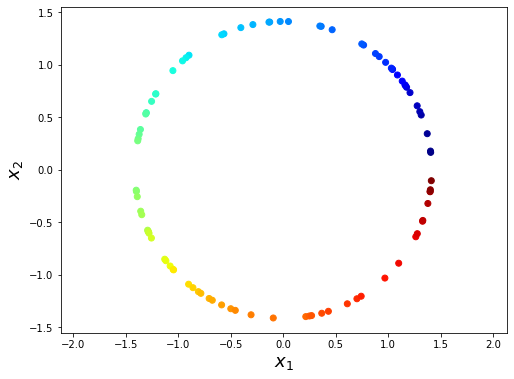

In [77]:
np.random.seed(0)
n = 90
theta = np.sort(np.random.uniform(0, 2*np.pi, n))
colors = np.linspace(1, 15, num=n)
 
x1 = np.sqrt(2) * np.cos(theta)
x2 = np.sqrt(2) * np.sin(theta)
X_circ = np.array([x1, x2]).T

fig = plt.figure(figsize=(8, 6))
plt.axis('equal')
plt.scatter(X_circ[:,0], X_circ[:,1], c=colors, cmap=plt.cm.jet)
 
plt.xlabel("$x_1$", fontsize= 18)
plt.ylabel("$x_2$", fontsize= 18)

plt.show()

### PCA

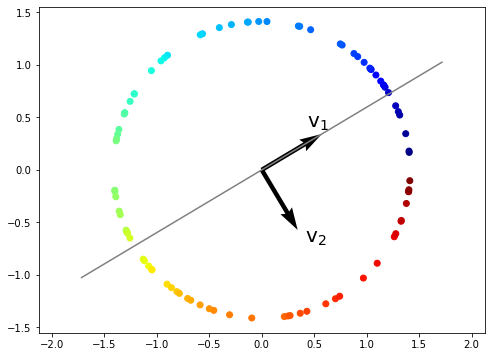

In [78]:
pca = PCA(n_components=2, random_state = 1)
pca.fit(X_circ)

fig = plt.figure(figsize=(8, 6))
plt.axis('equal')
plt.scatter(X_circ[:,0], X_circ[:,1], c=colors, cmap=plt.cm.jet)
plt.quiver(0, 0, pca.components_[0,0], pca.components_[0,1], color=['black'],
           width=0.01, angles='xy', scale_units='xy', scale=1.5)
plt.quiver(0, 0, pca.components_[1,0], pca.components_[1,1],
           color=['black'], width=0.01, angles='xy', scale_units='xy', scale=1.5)
plt.plot([-2*pca.components_[0,0], 2*pca.components_[0,0]],
            [-2*pca.components_[0,1], 2*pca.components_[0,1]], color='gray')
plt.text(0.5*pca.components_[0,0], 0.8*pca.components_[0,1], 
         "$\mathregular{v}_1$", color='black', fontsize=20)
plt.text(0.8*pca.components_[1,0], 0.8*pca.components_[1,1],
         "$\mathregular{v}_2$", color='black', fontsize=20)

plt.show()

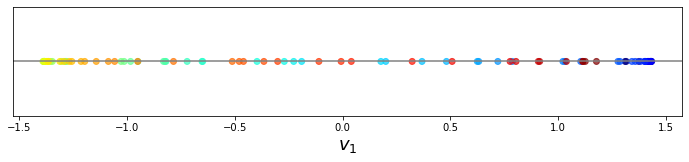

In [79]:
projected_points = pca.transform(X_circ)[:,0]
fig = plt.figure(figsize=(12, 2))
frame = plt.gca()
plt.scatter(projected_points, [0]*len(projected_points), c=colors, cmap=plt.cm.jet, alpha =0.7)
plt.axhline(y=0, color='grey')
plt.xlabel("$v_1$", fontsize=18)
frame.axes.get_yaxis().set_visible(False)

plt.show()

### Autoencoder with non-linear activations

In [80]:
seed = 3
np.random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)

class Autoencoder(nn.Module):
    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(in_shape, 64),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(32, enc_shape),
        )
        
        #Decoder
        self.decoder = nn.Sequential(
            nn.BatchNorm1d(enc_shape),
            nn.Linear(enc_shape, 32),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Dropout(0.1),
            nn.Linear(64, in_shape)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
    
model2 = Autoencoder(in_shape=2, enc_shape=1).double()
print(model2)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
  (decoder): Sequential(
    (0): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=1, out_features=32, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.1, inplace=False)
    (7): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [81]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters())

In [82]:
X_circ_scaled = MinMaxScaler().fit_transform(X_circ)
X_circ_train = torch.from_numpy(X_circ_scaled)

In [83]:
def train(model, loss_func, optimizer, n_epochs, X_train):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        encoded, decoded = model(X_train)
        loss = loss_func(decoded, X_train)
        loss.backward()
        optimizer.step()
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')
    return encoded, decoded

In [84]:
encoded, decoded = train(model2, loss_func, optimizer, 5000, X_circ_train)

epoch 500 	 Loss: 0.01391
epoch 1000 	 Loss: 0.005599
epoch 1500 	 Loss: 0.007459
epoch 2000 	 Loss: 0.005192
epoch 2500 	 Loss: 0.005775
epoch 3000 	 Loss: 0.005295
epoch 3500 	 Loss: 0.005112
epoch 4000 	 Loss: 0.004366
epoch 4500 	 Loss: 0.003526
epoch 5000 	 Loss: 0.003085


In [85]:
encoded = encoded.detach().numpy()

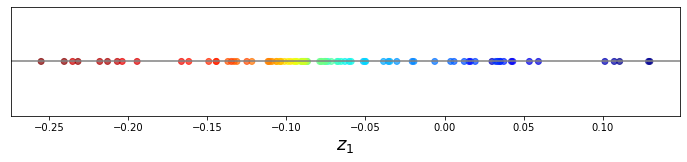

In [86]:
fig = plt.figure(figsize=(12, 2))
frame = plt.gca()
plt.scatter(encoded.flatten(), [0]*len(encoded.flatten()), c=colors, cmap=plt.cm.jet, alpha =0.7)
plt.axhline(y=0, color='grey')
plt.xlabel("$z_1$", fontsize=18)
frame.axes.get_yaxis().set_visible(False)
plt.show()